# PROJECT: SMS-SPAM-CLASSIFIER

In [407]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [408]:
df = pd.read_csv("sms-spam.csv", encoding="latin1")

In [409]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [410]:
df.shape

(5572, 5)

## DATA CLEANING

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [413]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [414]:
df.sample(3)

,v1,v2
3130,spam,LookAtMe!: Thanks for your purchase of a video...
1643,ham,U WILL SWITCH YOUR FONE ON DAMMIT!!
585,ham,Tell them u have a headache and just want to u...


In [415]:
# renaming the cols
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [416]:
df.sample(5)

,target,text
334,spam,Valentines Day Special! Win over å£1000 in our...
2838,ham,"Easy mate, * guess the quick drink was bit amb..."
1570,ham,No:-)i got rumour that you going to buy apartm...
2136,ham,Well done and ! luv ya all
875,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."


In [417]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [418]:
df['target']=encoder.fit_transform(df['target'])

In [419]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [420]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [421]:
# check for duplicate values
df.duplicated().sum()

403

In [422]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [423]:
df.duplicated().sum()

0

In [424]:
df.shape

(5169, 2)

## EDA

In [426]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [427]:
import matplotlib.pyplot as plt
import seaborn as sns

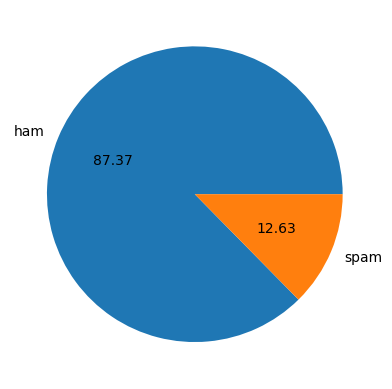

In [428]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [429]:
# Data is imbalanced

In [430]:
!pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [431]:
import nltk

In [432]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sony
[nltk_data]     Rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [433]:
df['num_characters']=df['text'].apply(len)

In [434]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [435]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Sony
[nltk_data]     Rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [436]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [437]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [438]:
# num of sentences
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [439]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [440]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [441]:
# ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [442]:
# spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


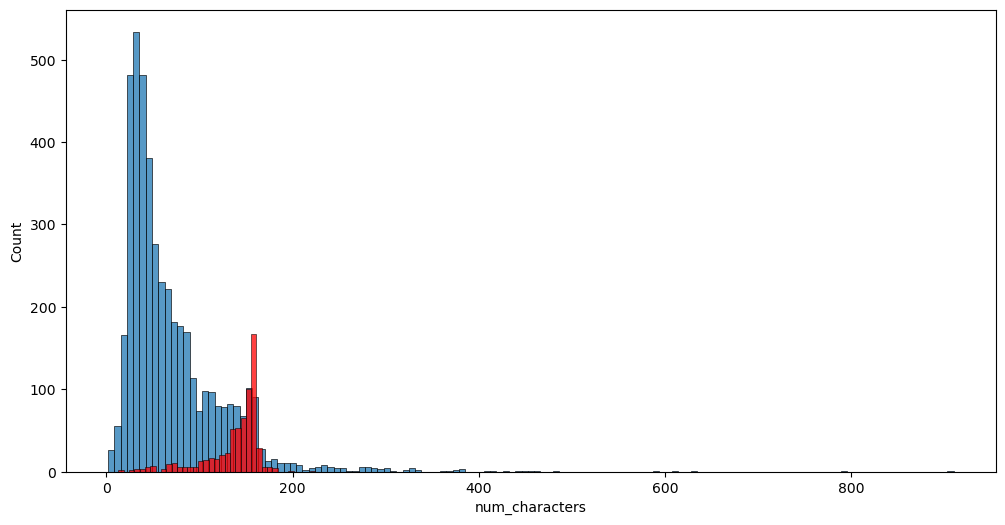

In [443]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

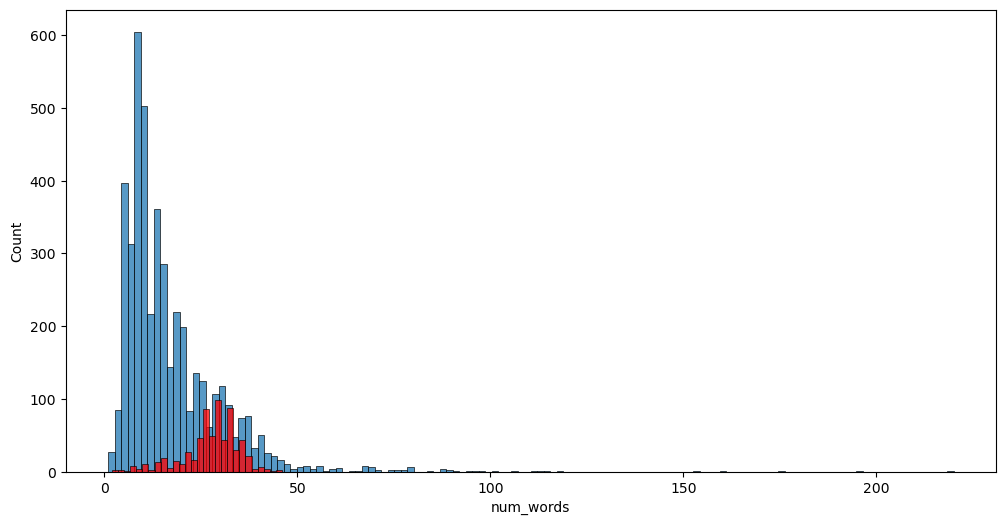

In [444]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

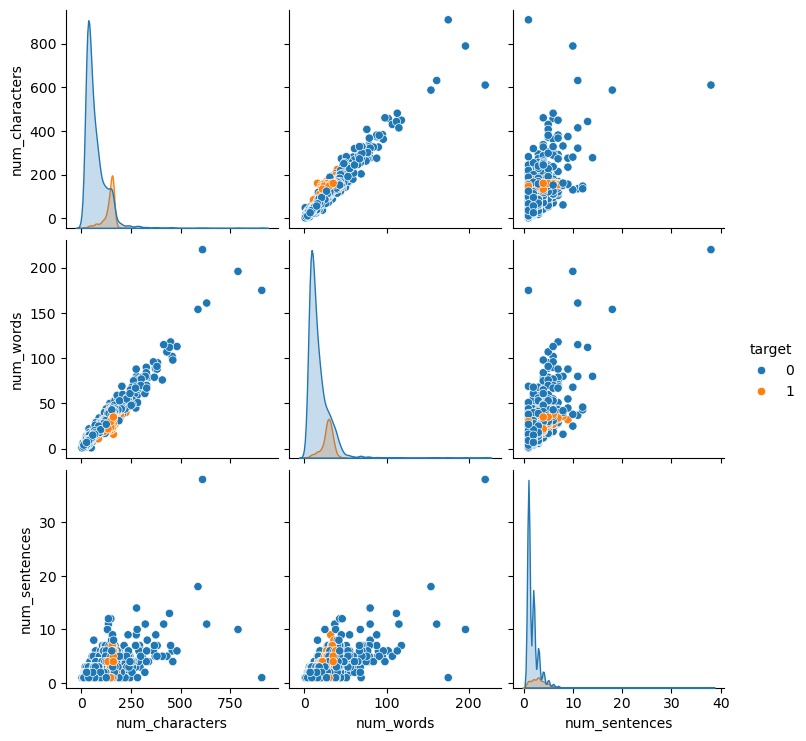

In [445]:
sns.pairplot(df,hue='target')
plt.show()

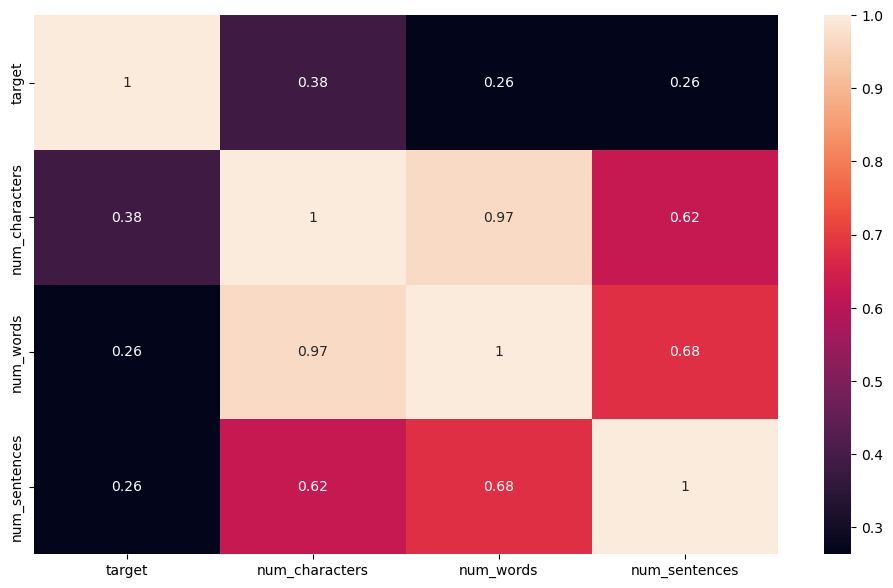

In [446]:
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(12,7))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

## DATA PREPROCESSING
#### lower case
#### tokenization
#### removing special characters
#### removing stop words and punctuation
#### stemming

In [448]:
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Sony
[nltk_data]     Rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [449]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('coding')


'code'

In [450]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [451]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [452]:
df['transformed_text']= df['text'].apply(transform_text)

In [453]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [454]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [455]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

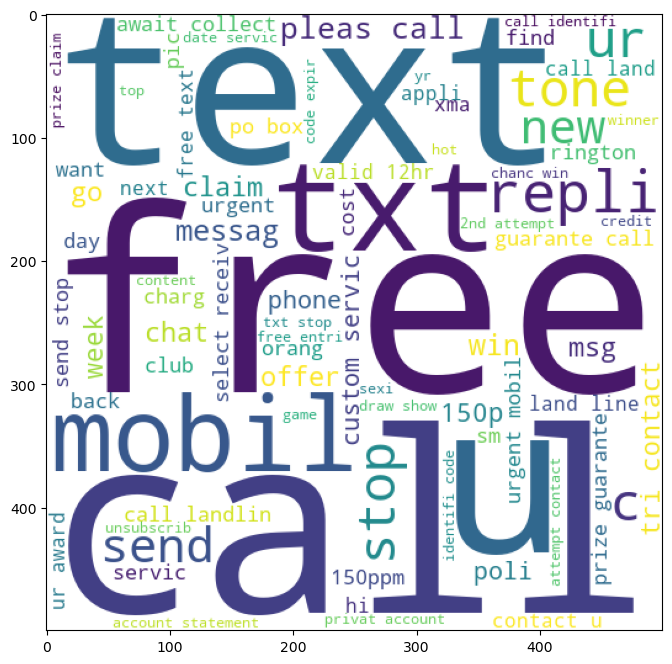

In [456]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

In [457]:
spam_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

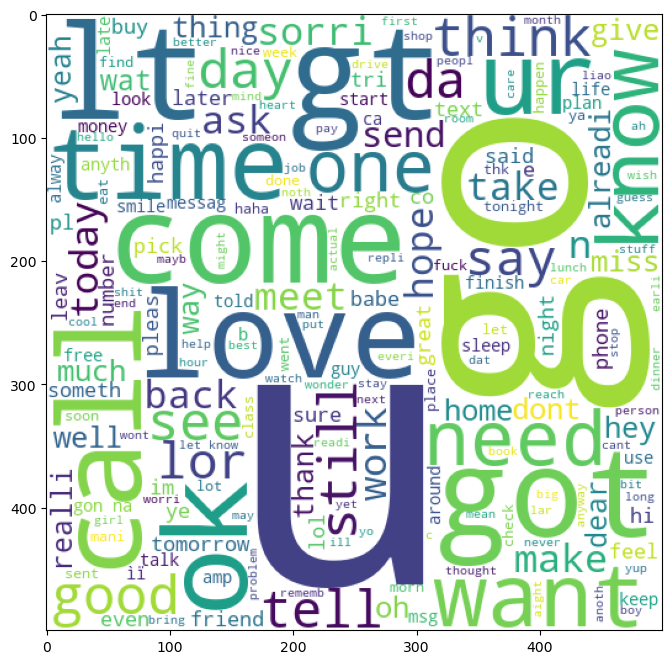

In [458]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

In [459]:
spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [460]:
len(spam_corpus)

9939

In [461]:
from collections import Counter

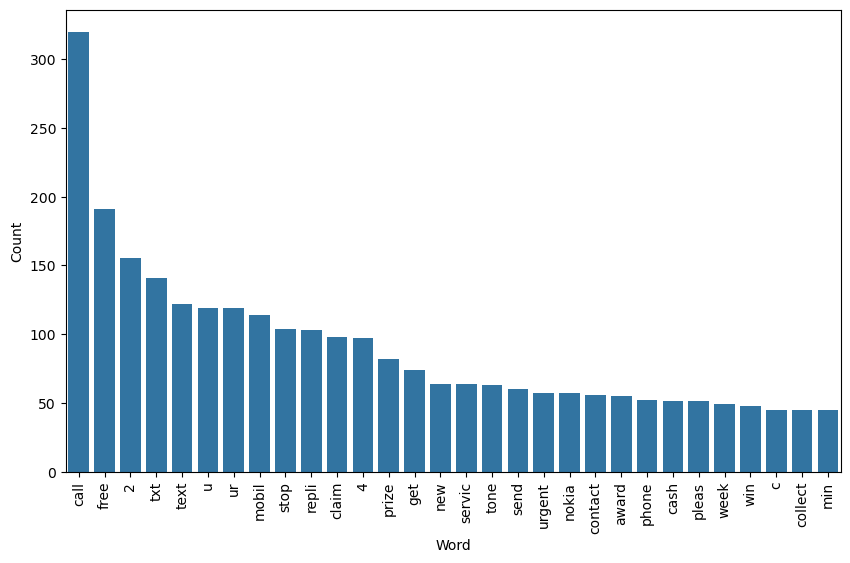

In [462]:
# Get top 30 words
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Rename columns for clarity
common_words.columns = ['Word', 'Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [463]:
ham_corpus= []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [464]:
len(ham_corpus)

35404

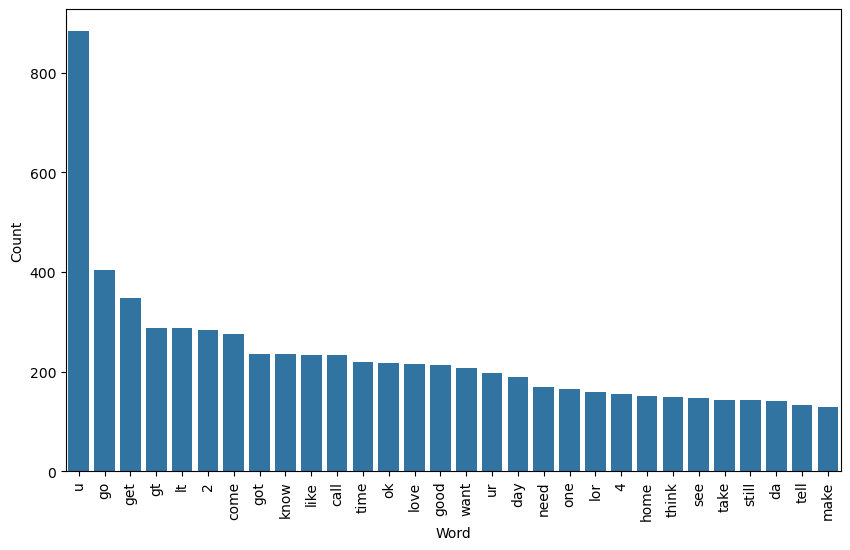

In [465]:
# Get top 30 words
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Rename columns for clarity
common_words.columns = ['Word', 'Count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [467]:
# text vectorization
# using bag of words

In [468]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [469]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [470]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [471]:
# appending the num_characters col to x
x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [472]:
x.shape

(5169, 3001)

In [473]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [474]:
from sklearn.model_selection import train_test_split

In [475]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [476]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [477]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [478]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8907156673114119
[[800  96]
 [ 17 121]]
0.5576036866359447


In [479]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[890   6]
 [ 21 117]]
0.9512195121951219


In [480]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [481]:
#  tfidf--> mnb

In [482]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [483]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [484]:
clfs ={
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost':abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [485]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [486]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.8665377176015474, 0.0)

In [487]:
accuracy_scores = []
precision_scores =[]

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8858800773694391
Precision -  0.8333333333333334
For  NB
Accuracy -  0.9738878143133463
Precision -  0.9512195121951219
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8773584905660378
For  LR
Accuracy -  0.8665377176015474
Precision -  0.0
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9818181818181818
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [488]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [489]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.969052,0.981818
8,ETC,0.978723,0.975410
2,NB,0.973888,0.951220
10,xgb,0.971954,0.943089
6,AdaBoost,0.964217,0.931624
9,GBDT,0.950677,0.930693
7,BgC,0.966151,0.899225
3,DT,0.943907,0.877358
1,KN,0.885880,0.833333
0,SVC,0.866538,0.000000


In [490]:
performance_df1= pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.969052
1,ETC,Accuracy,0.978723
2,NB,Accuracy,0.973888
3,xgb,Accuracy,0.971954
4,AdaBoost,Accuracy,0.964217
5,GBDT,Accuracy,0.950677
6,BgC,Accuracy,0.966151
7,DT,Accuracy,0.943907
8,KN,Accuracy,0.885880
9,SVC,Accuracy,0.866538


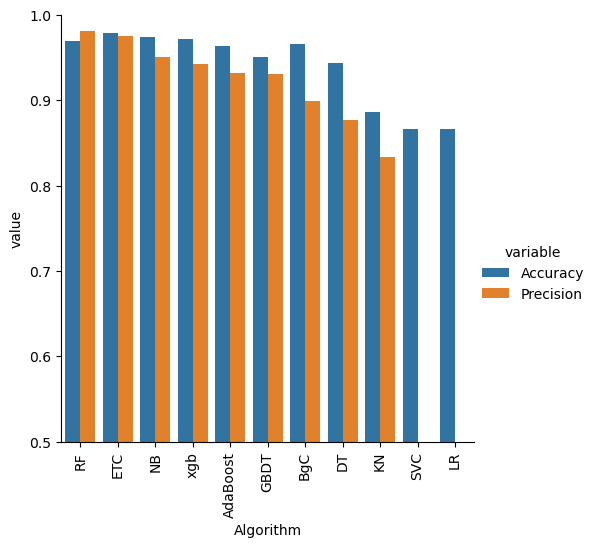

In [491]:
sns.catplot(x= 'Algorithm', y='value',
            hue= 'variable', data= performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [492]:
# model improve
# 1. Change the max_features parameter of TfIdf 

In [493]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000': precision_score})

In [494]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling': precision_score})

In [495]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [496]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [497]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,RF,0.969052,0.981818,0.969052,<function precision_score at 0x00000269CA83BCE0>,0.969052,<function precision_score at 0x00000269CA83BCE0>
1,ETC,0.978723,0.975410,0.978723,<function precision_score at 0x00000269CA83BCE0>,0.978723,<function precision_score at 0x00000269CA83BCE0>
2,NB,0.973888,0.951220,0.973888,<function precision_score at 0x00000269CA83BCE0>,0.973888,<function precision_score at 0x00000269CA83BCE0>
3,xgb,0.971954,0.943089,0.971954,<function precision_score at 0x00000269CA83BCE0>,0.971954,<function precision_score at 0x00000269CA83BCE0>
4,AdaBoost,0.964217,0.931624,0.964217,<function precision_score at 0x00000269CA83BCE0>,0.964217,<function precision_score at 0x00000269CA83BCE0>
5,GBDT,0.950677,0.930693,0.950677,<function precision_score at 0x00000269CA83BCE0>,0.950677,<function precision_score at 0x00000269CA83BCE0>
6,BgC,0.966151,0.899225,0.966151,<function precision_score at 0x00000269CA83BCE0>,0.966151,<function precision_score at 0x00000269CA83BCE0>
7,DT,0.943907,0.877358,0.943907,<function precision_score at 0x00000269CA83BCE0>,0.943907,<function precision_score at 0x00000269CA83BCE0>
8,KN,0.885880,0.833333,0.885880,<function precision_score at 0x00000269CA83BCE0>,0.885880,<function precision_score at 0x00000269CA83BCE0>
9,SVC,0.866538,0.000000,0.866538,<function precision_score at 0x00000269CA83BCE0>,0.866538,<function precision_score at 0x00000269CA83BCE0>


In [588]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))